<a href="https://colab.research.google.com/github/hermelawesene/DNN-Activation-Function/blob/main/Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

The primary objective of this assignment is to investigate the performance of Deep Neural Networks (DNNs) on the MNIST handwritten digit classification dataset by exploring two key aspects: (1) the impact of different activation functions (sigmoid, tanh, and ReLU) and their variants (ReLU, Leaky ReLU, Parametric ReLU) on training efficiency and model accuracy, and (2) the effect of network depth on classification performance. Through this analysis, we aim to:
- Demonstrate how ReLU addresses the vanishing gradient problem compared to sigmoid and tanh, using training metrics and visualizations.
- Compare the performance differences among ReLU variants to understand their practical implications.
- Evaluate how varying network depths (1 to 5 layers) influence model accuracy, supported by empirical results and plots.
This study employs a simple DNN architecture, standard SGD optimization, and comprehensive visualizations to provide clear, evidence-based insights into these fundamental neural network properties.

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU
from keras.utils import to_categorical

In [ ]:
# Load and preprocess data
(X_train, y_train), (X_val, y_val) = mnist.load_data()

In [ ]:
# Normalize data
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [ ]:
# One-hot encoding
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

In [ ]:
# Flatten the data
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

In [ ]:
# Training parameters
n_epochs = 10
batch_size = 256
validation_split = 0.2

In [ ]:
# Task 1.1: Activation Functions (sigmoid, tanh, relu)
activations = ['sigmoid', 'tanh', 'relu']
histories_1_1 = {}

for act in activations:
    model = Sequential([
        Dense(700, activation=act, input_dim=784),
        Dense(350, activation=act),
        Dense(150, activation=act),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    histories_1_1[act] = model.fit(X_train, y_train,
                                 epochs=n_epochs,
                                 batch_size=batch_size,
                                 validation_split=validation_split,
                                 verbose=1)
    print(f"\n{act.upper()} Model Summary:")
    model.summary()

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.1018 - loss: 2.3305 - val_accuracy: 0.1060 - val_loss: 2.2988
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1153 - loss: 2.2966 - val_accuracy: 0.1060 - val_loss: 2.2953
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1164 - loss: 2.2935 - val_accuracy: 0.1077 - val_loss: 2.2919
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.1245 - loss: 2.2909 - val_accuracy: 0.1060 - val_loss: 2.2885
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.1228 - loss: 2.2874 - val_accuracy: 0.1060 - val_loss: 2.2860
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.1249 - loss: 2.2845 - val_accuracy: 0.1060 - val_loss: 2.2823
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.1302 - loss: 2.2802 - val_accuracy: 0.1060 - val_loss: 2.2780
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.1225 - loss: 2.2771 - val_a

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 150)                 │          52,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,012 (3.24 MB)

 Trainable params: 849,010 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.5866 - loss: 1.4962 - val_accuracy: 0.8730 - val_loss: 0.5808
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8656 - loss: 0.5639 - val_accuracy: 0.8902 - val_loss: 0.4348
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8809 - loss: 0.4515 - val_accuracy: 0.9005 - val_loss: 0.3804
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8902 - loss: 0.4031 - val_accuracy: 0.9063 - val_loss: 0.3507
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8961 - loss: 0.3756 - val_accuracy: 0.9093 - val_loss: 0.3302
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9030 - loss: 0.3477 - val_accuracy: 0.9137 - val_loss: 0.3161
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9083 - loss: 0.3257 - val_accuracy: 0.9155 - val_loss: 0.3051
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9111 - loss: 0.3164 - val_

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                     │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 150)                 │          52,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,012 (3.24 MB)

 Trainable params: 849,010 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4059 - loss: 2.0268 - val_accuracy: 0.8206 - val_loss: 1.0296
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8199 - loss: 0.8724 - val_accuracy: 0.8753 - val_loss: 0.5338
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8709 - loss: 0.5226 - val_accuracy: 0.8941 - val_loss: 0.4080
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8876 - loss: 0.4231 - val_accuracy: 0.9022 - val_loss: 0.3551
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8984 - loss: 0.3702 - val_accuracy: 0.9097 - val_loss: 0.3227
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9074 - loss: 0.3379 - val_accuracy: 0.9152 - val_loss: 0.3018
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9108 - loss: 0.3210 - val_accuracy: 0.9181 - val_loss: 0.2858
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9154 - loss: 0.3001 - val_ac

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 150)                 │          52,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,012 (3.24 MB)

 Trainable params: 849,010 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Task 1.2: ReLU Variants
relu_variants = {
    'relu': lambda: Dense(700, activation='relu'),
    'leaky': lambda: [Dense(700), LeakyReLU(alpha=0.1)],
    'parametric': lambda: [Dense(700), PReLU()]
}
histories_1_2 = {}

for variant in relu_variants:
    model = Sequential()
    if variant == 'relu':
        model.add(relu_variants[variant]())
    else:
        for layer in relu_variants[variant]():
            model.add(layer)
    model.add(Dense(350, activation=variant if variant == 'relu' else 'linear'))
    if variant != 'relu':
        model.add(LeakyReLU(alpha=0.1) if variant == 'leaky' else PReLU())
    model.add(Dense(150, activation=variant if variant == 'relu' else 'linear'))
    if variant != 'relu':
        model.add(LeakyReLU(alpha=0.1) if variant == 'leaky' else PReLU())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    histories_1_2[variant] = model.fit(X_train, y_train,
                                     epochs=n_epochs,
                                     batch_size=batch_size,
                                     validation_split=validation_split,
                                     verbose=1)
    print(f"\n{variant.upper()} ReLU Variant Summary:")
    model.summary()

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4342 - loss: 2.0239 - val_accuracy: 0.8134 - val_loss: 1.0471
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8165 - loss: 0.8872 - val_accuracy: 0.8738 - val_loss: 0.5404
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8708 - loss: 0.5248 - val_accuracy: 0.8909 - val_loss: 0.4181
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8863 - loss: 0.4298 - val_accuracy: 0.9015 - val_loss: 0.3600
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8980 - loss: 0.3712 - val_accuracy: 0.9082 - val_loss: 0.3279
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9054 - loss: 0.3403 - val_accuracy: 0.9152 - val_loss: 0.3042
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9118 - loss: 0.3168 - val_accuracy: 0.9171 - val_loss: 0.2892
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9163 - loss: 0.2988 - val_

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 150)                 │          52,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,012 (3.24 MB)

 Trainable params: 849,010 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.4099 - loss: 2.0075 - val_accuracy: 0.8041 - val_loss: 0.9507
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8157 - loss: 0.8226 - val_accuracy: 0.8733 - val_loss: 0.5211
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8672 - loss: 0.5172 - val_accuracy: 0.8933 - val_loss: 0.4049
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8867 - loss: 0.4196 - val_accuracy: 0.9053 - val_loss: 0.3529
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8980 - loss: 0.3687 - val_accuracy: 0.9078 - val_loss: 0.3236
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9035 - loss: 0.3414 - val_accuracy: 0.9143 - val_loss: 0.3021
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9076 - loss: 0.3211 - val_accuracy: 0.9169 - val_loss: 0.2881
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9149 - loss: 0.2968 - val_a

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 350)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 150)                 │          52,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,012 (3.24 MB)

 Trainable params: 849,010 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4427 - loss: 2.0208 - val_accuracy: 0.8158 - val_loss: 1.0161
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8194 - loss: 0.8678 - val_accuracy: 0.8731 - val_loss: 0.5309
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8686 - loss: 0.5250 - val_accuracy: 0.8938 - val_loss: 0.4080
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8900 - loss: 0.4175 - val_accuracy: 0.9043 - val_loss: 0.3529
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8970 - loss: 0.3741 - val_accuracy: 0.9112 - val_loss: 0.3207
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9066 - loss: 0.3334 - val_accuracy: 0.9169 - val_loss: 0.3008
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9121 - loss: 0.3113 - val_accuracy: 0.9209 - val_loss: 0.2817
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9181 - loss: 0.2955 - val_ac

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_3 (PReLU)                    │ (None, 700)                 │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_4 (PReLU)                    │ (None, 350)                 │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 150)                 │          52,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_5 (PReLU)                    │ (None, 150)                 │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 850,212 (3.24 MB)

 Trainable params: 850,210 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Task 2.1: Different Depths
depths = [1, 2, 3, 4, 5]
histories_2_1 = {}

for depth in depths:
    model = Sequential()
    model.add(Dense(700, activation='relu', input_dim=784))
    for _ in range(depth - 1):
        model.add(Dense(350, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    histories_2_1[depth] = model.fit(X_train, y_train,
                                   epochs=n_epochs,
                                   batch_size=batch_size,
                                   validation_split=validation_split,
                                   verbose=1)
    print(f"\nDepth {depth} Model Summary:")
    model.summary()

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4559 - loss: 1.9031 - val_accuracy: 0.8194 - val_loss: 1.0202
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8187 - loss: 0.9341 - val_accuracy: 0.8625 - val_loss: 0.6652
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8508 - loss: 0.6616 - val_accuracy: 0.8789 - val_loss: 0.5323
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8700 - loss: 0.5477 - val_accuracy: 0.8896 - val_loss: 0.4637
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8779 - loss: 0.4876 - val_accuracy: 0.8966 - val_loss: 0.4222
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8886 - loss: 0.4387 - val_accuracy: 0.9006 - val_loss: 0.3936
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8927 - loss: 0.4134 - val_accuracy: 0.9038 - val_loss: 0.3729
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8954 - loss: 0.3953 - val_accu

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 10)                  │           7,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 556,512 (2.12 MB)

 Trainable params: 556,510 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4658 - loss: 1.9637 - val_accuracy: 0.8358 - val_loss: 0.9871
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8326 - loss: 0.8659 - val_accuracy: 0.8781 - val_loss: 0.5702
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8667 - loss: 0.5670 - val_accuracy: 0.8924 - val_loss: 0.4451
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8838 - loss: 0.4577 - val_accuracy: 0.9028 - val_loss: 0.3875
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8958 - loss: 0.4034 - val_accuracy: 0.9056 - val_loss: 0.3538
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8984 - loss: 0.3686 - val_accuracy: 0.9108 - val_loss: 0.3315
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9044 - loss: 0.3500 - val_accuracy: 0.9139 - val_loss: 0.3142
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9078 - loss: 0.3313 - val_acc

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 10)                  │           3,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 798,362 (3.05 MB)

 Trainable params: 798,360 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4084 - loss: 2.0514 - val_accuracy: 0.8078 - val_loss: 1.0972
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.8150 - loss: 0.9214 - val_accuracy: 0.8680 - val_loss: 0.5554
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8634 - loss: 0.5430 - val_accuracy: 0.8891 - val_loss: 0.4193
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8850 - loss: 0.4301 - val_accuracy: 0.9012 - val_loss: 0.3629
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8969 - loss: 0.3749 - val_accuracy: 0.9093 - val_loss: 0.3280
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9035 - loss: 0.3461 - val_accuracy: 0.9130 - val_loss: 0.3080
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9108 - loss: 0.3166 - val_accuracy: 0.9179 - val_loss: 0.2921
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9163 - loss: 0.3012 - val_

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 350)                 │         122,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 10)                  │           3,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 921,212 (3.51 MB)

 Trainable params: 921,210 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.3701 - loss: 2.1401 - val_accuracy: 0.7761 - val_loss: 1.2609
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7920 - loss: 1.0140 - val_accuracy: 0.8635 - val_loss: 0.5574
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8609 - loss: 0.5400 - val_accuracy: 0.8883 - val_loss: 0.4144
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8846 - loss: 0.4227 - val_accuracy: 0.9013 - val_loss: 0.3580
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8996 - loss: 0.3640 - val_accuracy: 0.9106 - val_loss: 0.3210
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9066 - loss: 0.3315 - val_accuracy: 0.9179 - val_loss: 0.2935
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9143 - loss: 0.3060 - val_accuracy: 0.9233 - val_loss: 0.2774
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.9188 - loss: 0.2887 - val_ac

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 350)                 │         122,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 350)                 │         122,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 10)                  │           3,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,044,062 (3.98 MB)

 Trainable params: 1,044,060 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.2836 - loss: 2.2168 - val_accuracy: 0.7466 - val_loss: 1.6435
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7725 - loss: 1.2783 - val_accuracy: 0.8615 - val_loss: 0.5704
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.8605 - loss: 0.5334 - val_accuracy: 0.8903 - val_loss: 0.3970
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8900 - loss: 0.3954 - val_accuracy: 0.9049 - val_loss: 0.3319
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9029 - loss: 0.3406 - val_accuracy: 0.9136 - val_loss: 0.2993
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9113 - loss: 0.3053 - val_accuracy: 0.9214 - val_loss: 0.2778
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9188 - loss: 0.2848 - val_accuracy: 0.9275 - val_loss: 0.2561
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9244 - loss: 0.2610 - val_ac

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)                    │ (None, 700)                 │         549,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 350)                 │         245,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 350)                 │         122,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 350)                 │         122,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 350)                 │         122,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 10)                  │           3,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,166,912 (4.45 MB)

 Trainable params: 1,166,910 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Visualizations
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

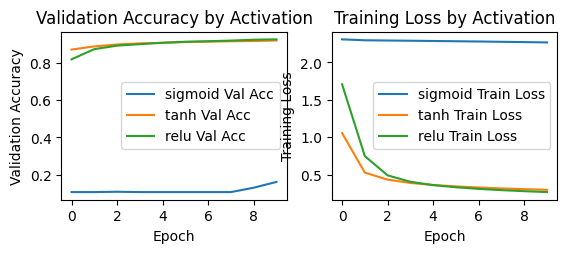

In [ ]:
# Task 1.1: Activation Functions Visualization
plt.subplot(2, 2, 1)
for act in activations:
    plt.plot(histories_1_1[act].history['val_accuracy'], label=f'{act} Val Acc')
plt.title('Validation Accuracy by Activation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
for act in activations:
    plt.plot(histories_1_1[act].history['loss'], label=f'{act} Train Loss')
plt.title('Training Loss by Activation')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

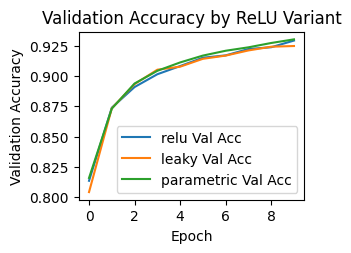

In [ ]:
# Task 1.2: ReLU Variants Visualization
plt.subplot(2, 2, 3)
for variant in relu_variants:
    plt.plot(histories_1_2[variant].history['val_accuracy'], label=f'{variant} Val Acc')
plt.title('Validation Accuracy by ReLU Variant')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

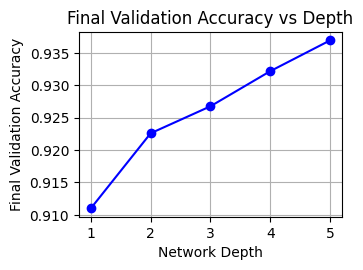

In [ ]:
# Task 2.1: Depth Visualization
plt.subplot(2, 2, 4)
final_acc = [histories_2_1[depth].history['val_accuracy'][-1] for depth in depths]
plt.plot(depths, final_acc, 'bo-')
plt.title('Final Validation Accuracy vs Depth')
plt.xlabel('Network Depth')
plt.ylabel('Final Validation Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Print final validation accuracies
print("\nFinal Validation Accuracies:")
print("Activation Functions:")
for act in activations:
    print(f"{act}: {histories_1_1[act].history['val_accuracy'][-1]:.4f}")

print("ReLU Variants:")
for variant in relu_variants:
    print(f"{variant}: {histories_1_2[variant].history['val_accuracy'][-1]:.4f}")

print("Depths:")
for depth in depths:
    print(f"Depth {depth}: {histories_2_1[depth].history['val_accuracy'][-1]:.4f}")


Final Validation Accuracies:
Activation Functions:
sigmoid: 0.1608
tanh: 0.9222
relu: 0.9280
ReLU Variants:
relu: 0.9293
leaky: 0.9248
parametric: 0.9303
Depths:
Depth 1: 0.9110
Depth 2: 0.9226
Depth 3: 0.9268
Depth 4: 0.9322
Depth 5: 0.9369
